# FINAL PROJECT

In [111]:
# import necessary packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score 

from sklearn.model_selection import train_test_split 

%matplotlib inline

###  3. Do movies with a runtime over 100 minutes have a higher probability of grossing at least 20 million dollars than movies with a IMDb user score of at least 7.0?

In [2]:
df = pd.read_csv("/Users/emmachen/Downloads/CPSC392/HW:Projects/Final/movies.csv")
df = df.dropna() # remove missing values
df = df.reset_index(drop=True) 
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
# filter dataset given condition of grossing over 20 million
gross = (df["gross"] >= 20000000)
df_gross = df[gross] # store our filtered data in df_gross

# ----------------------

# filter dataset given conditions of having a runtime greater than 100min & grossing over 20 million
runtime_gross = ((df["runtime"] > 100) & (df["gross"] >= 20000000))
df_runtime_gross = df[runtime_gross] # store our filtered data in df_runtime100 

prob_runtime = df_runtime_gross.shape[0] / df_gross.shape[0] # calculate probability
print("Probability of a movie with a runtime over 100 minutes grossing at least 20 million dollars:", prob_runtime)

# ----------------------

# filter dataset given conditions of having a IMDb user score of at least 7 & grossing over 20 million
score_gross = ((df["score"] >= 7.0) & (df["gross"] >= 20000000))
df_score_gross = df[score_gross] # store our filtered data in df_score_gross

prob_score = df_score_gross.shape[0] / df_gross.shape[0] # calculate probability
print("Probability of a movie with a score of at least 7 grossing at least 20 million dollars:", prob_score)

Probability of a movie with a runtime over 100 minutes grossing at least 20 million dollars: 0.6511371973587674
Probability of a movie with a score of at least 7 grossing at least 20 million dollars: 0.30117388114453414


In [4]:
# make a new DF with just the probabilities above
Group = ["Runtime over 100 minutes", "IMDb score of at least 7"] # column 1 of the df
Probability = [prob_runtime, prob_score] # column 2 of the df
myNewDF = {"Group": Group, "Probability": Probability} # create a dictionary for df
probDF = pd.DataFrame(myNewDF) # create the df using pandas
probDF.head()

,Group,Probability
0,Runtime over 100 minutes,0.651137
1,IMDb score of at least 7,0.301174


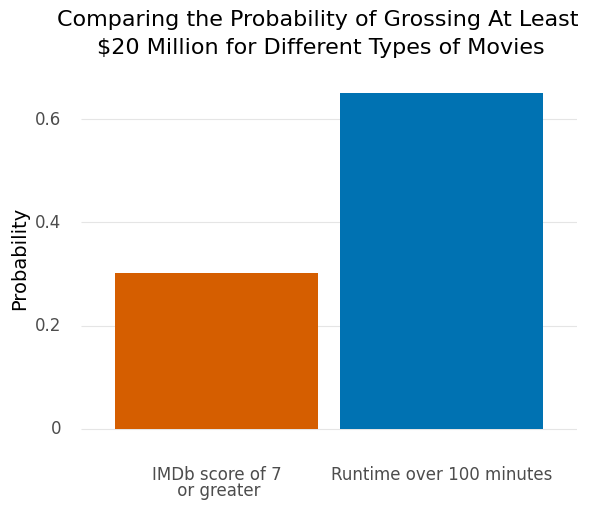

<ggplot: (8761979648793)>

In [124]:
(ggplot(probDF, aes(x = "Group", y = "Probability", fill = "Group")) + 
     geom_bar(stat="identity") + 
     theme_minimal() +
     labs(x = "", y = "Probability") + 
     scale_x_discrete(labels = ("IMDb score of 7\n or greater", "Runtime over 100 minutes")) +
     ggtitle("Comparing the Probability of Grossing At Least \n$20 Million for Different Types of Movies") +
     scale_fill_manual(["#d55e00", "#0072b2"]) +
     theme(panel_grid_minor_x = element_blank(),
     panel_grid_minor_y = element_blank(), 
     panel_grid_major_x = element_blank(),
     axis_text_x = element_text(size = 12),
     axis_title_x = element_text(size = 14),
     axis_text_y = element_text(size = 12),
     axis_title_y = element_text(size = 14),
     plot_title = element_text(lineheight = 1.5, size = 16),
     legend_text = element_text(size = 12),
     legend_position = "none"))

*Caption: Comparing the probability of grossing at least 20,000,000 dollars between movies that have an IMDb score of at least 7.0 and movies that have a runtime over 100 minutes. The greater the probability, as plotted on the y-axis, the more likely a movie will gross at least 20,000,000 dollars. As the graph shows, movies with a runtime over 100 minutes have a higher probability of grossing at least 20,000,000 dollars than movies with an IMDb score of at least 7.0.*

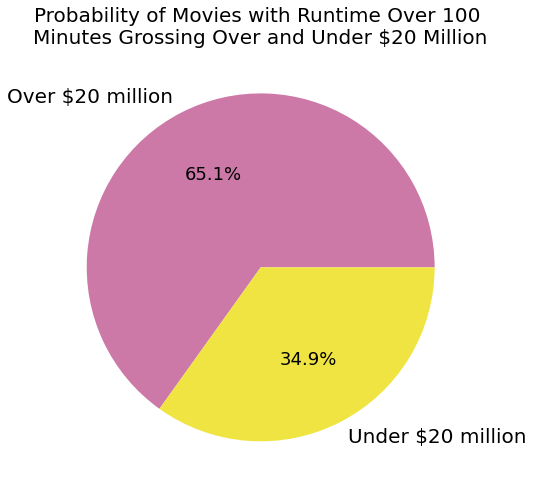

In [138]:
prob = [0.651137, 0.348863]
labels = ["Over $20 million", "Under $20 million"]
c1 = ["#cc79a7", "#f0e442"] 
SMALL_SIZE = 18

plt.rc('font', size=SMALL_SIZE)
plt.figure(figsize=(8,8))
plt.title("Probability of Movies with Runtime Over 100 \nMinutes Grossing Over and Under $20 Million")
plt.pie(prob, labels = labels, autopct = '%2.1f%%', colors = c1)
plt.show()

*Caption: Comparing the probability of grossing over and under 20,000,000 dollars for movies that have a runtime over 100 minutes. As the chart shows, movies with a runtime over 100 minutes are more likely to gross over 20,000,000 dollars than they are to gross under 20,000,000 dollars.*

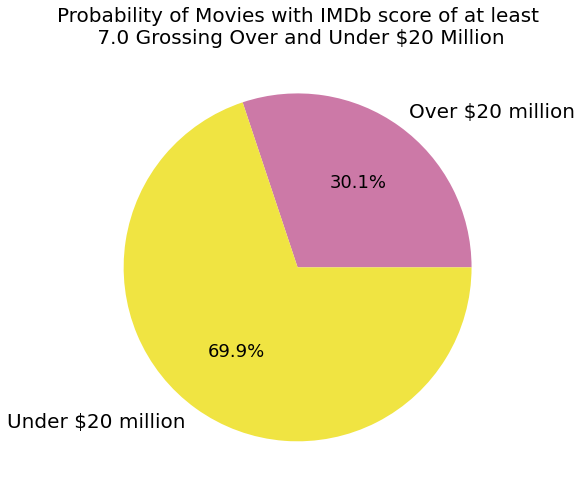

In [139]:
prob = [0.301174, 0.698826]
labels = ["Over $20 million", "Under $20 million"]
c1 = ["#cc79a7", "#f0e442"]
SMALL_SIZE = 18

plt.rc('font', size=SMALL_SIZE)
plt.figure(figsize=(8,8))
plt.title("Probability of Movies with IMDb score of at least\n 7.0 Grossing Over and Under $20 Million")
plt.pie(prob, labels = labels, autopct = '%2.1f%%', colors = c1)
plt.show()

*Caption: Comparing the probability of grossing over and under 20,000,000 dollars for movies that have an IMDb score over 7.0. As the chart shows, movies with a runtime over 100 minutes are more likely to gross under 20,000,000 dollars than they are to gross over 20,000,000 dollars.*

Based on the analyses above, movies with a runtime over 100 minutes have a higher probability (approx 0.65) of grossing at least 20,000,000 dollars than movies with an IMDb user score of at least 7.0 (probability of approx 0.30). In other words, based on this dataset, movies with a runtime over 100 minutes are more likely to gross 20,000,000 dollars or more compared to movies with an IMDb user score of at least 7.0. So, when trying to make a movie that will gross at least 20,000,000 dollars, it might be better to focus on achieving a longer runtime than aiming towards a good IMDb score.

To answer this question, we completed a number of calculations. We first calculated the probability of movies with a runtime over 100 minutes having a gross of at least 20,000,000 dollars. To do this, we divided the total number of movies with a gross of at least 20,000,000 dollars by the number of movies with both a gross of at least 20,000,000 dollars and a runtime over 100 minutes. Then, we calculated the probability of movies with an IMDb score of at least 7.0 having a gross of at least 20,000,000 dollars. To do this, we divided the total number of movies with a gross of at least 20,000,000 dollars by the number of movies with both a gross of at least 20,000,000 dollars and a score of at least 7.0. Once we calculated these two probabilities, we plotted them on a bar graph and pie chart in order to directly compare them to each other. A higher probability indicates a greater likelihood that something will occur; in the context of this question, movies with a runtime over 100 minutes have a probability of 0.65, versus the smaller 0.30 probability of movies with an IMDb score of at least 7, of grossing at least 20,000,000 dollars.

###  4. Out of all the continuous/interval variables (budget, runtime, score, votes, year), which are the strongest predictors of gross?

In [6]:
features = ["budget", "runtime", "score", "votes", "year"]
X = df[features]
y = df["gross"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) # train test split

# z-scoring
zScore = StandardScaler() 
Xz_train = zScore.fit_transform(X_train)
Xz_test = zScore.transform(X_test)

# create and fit model with training data
lr = LinearRegression()
lr.fit(Xz_train,y_train)

# mse
trainmse = mean_squared_error(y_train, lr.predict(Xz_train))
testmse = mean_squared_error(y_test, lr.predict(Xz_test))

# r^2
trainr2 = lr.score(Xz_train, y_train)
testr2 = lr.score(Xz_test, y_test)

print("\033[4mTRAINING SET\033[0m\nmse:", trainmse, "\nr2 :", trainr2)
print("\n\033[4mTEST SET\033[0m\nmse:", testmse, "\nr2 :", testr2)

TRAINING SET
mse: 1235341799227197.2 
r2 : 0.6434543709820107

TEST SET
mse: 1243313117144092.5 
r2 : 0.5362030598628513


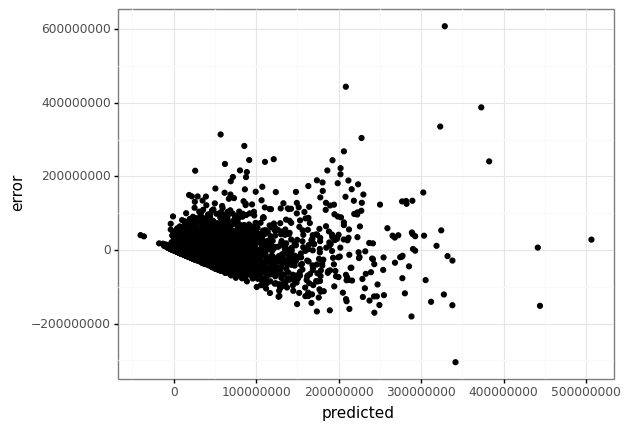

<ggplot: (8761979023002)>

In [7]:
# check assumptions for linear regression
pred = lr.predict(Xz_train)

assump = pd.DataFrame({"error": y_train - pred, "predicted": pred})

ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw()

In [27]:
# fit model with all non-z scored data
lr_all = LinearRegression()
lr_all.fit(X, y)

# create dataframe with coefficients
coef = pd.DataFrame({"Predictor": features, "Coefficient": lr_all.coef_}) 
coef.head()

,Predictor,Coefficient
0,budget,0.828589
1,runtime,-151477.874352
2,score,54683.160058
3,votes,189.052445
4,year,-358206.084588


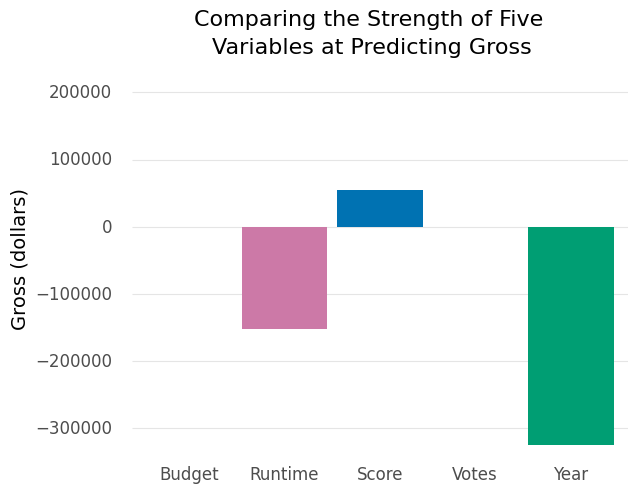

<ggplot: (8761979387709)>

In [100]:
(ggplot(coef, aes(x = "Predictor", y = "Coefficient", fill = "Predictor")) + 
     geom_bar(stat="identity") + 
     theme_minimal() +
     labs(x = "", y = "Gross (dollars)") + 
     ggtitle("Comparing the Strength of Five \nVariables at Predicting Gross") +
     coord_cartesian(ylim = (-300000,200000)) +
     scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2", "#f0e442", "#009E73"]) +
     scale_x_discrete(labels = ("Budget", "Runtime", "Score", "Votes", "Year")) + 
     theme(panel_grid_minor_x = element_blank(),
     panel_grid_minor_y = element_blank(), 
     panel_grid_major_x = element_blank(),
     axis_text_x = element_text(size = 12),
     axis_title_x = element_text(size = 14),
     axis_text_y = element_text(size = 12),
     axis_title_y = element_text(size = 14),
     plot_title = element_text(lineheight = 1.5, size = 16),
     legend_text = element_text(size = 12),
     legend_position = "none"))

*Caption: Comparing the strength of the relationship of all the predictors, which are all continuous variables, to gross, as determined by the Linear Regression model. As the graph shows, year and runtime are the strongest predictors of gross. Votes and budget do not appear to be visible because their coefficient values are much smaller than that of runtime, score, and year.*

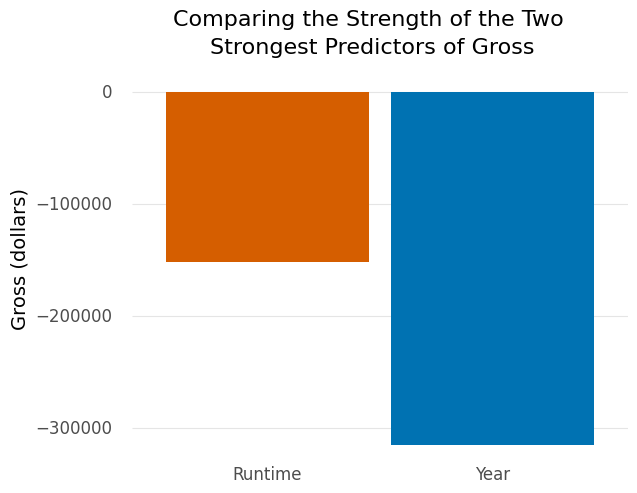

<ggplot: (8761980383970)>

In [98]:
dfcoef = coef.loc[[1, 4], :]

(ggplot(dfcoef, aes(x = "Predictor", y = "Coefficient", fill = "Predictor")) + 
     geom_bar(stat="identity") + 
     theme_minimal() +
     labs(x = "", y = "Gross (dollars)") + 
     ggtitle("Comparing the Strength of the Two \nStrongest Predictors of Gross") +
     coord_cartesian(ylim = (-300000,0)) +
     scale_fill_manual(["#d55e00", "#0072b2"]) +
     scale_x_discrete(labels = ("Runtime", "Year")) + 
     theme(panel_grid_minor_x = element_blank(),
     panel_grid_minor_y = element_blank(), 
     panel_grid_major_x = element_blank(),
     axis_text_x = element_text(size = 12),
     axis_title_x = element_text(size = 14),
     axis_text_y = element_text(size = 12),
     axis_title_y = element_text(size = 14),
     plot_title = element_text(lineheight = 1.5, size = 16),
     legend_text = element_text(size = 12),
     legend_position = "none"))

*Caption: Comparing the strength of the relationship of the two strongest predictors, runtime and year, to gross, as determined by the Linear Regression model. As the graph shows, year is the strongest predictor of gross, and both predictors have a negative relationship with gross, meaning that as each predictor increases, gross decreases.*

Based on the analyses above, year and runtime are the strongest predictors of a movie's gross. Year had the coefficient of greatest magnitude of about -358,206. In other words, the release date of a movie increasing by 1 year is associated with a 358,206 dollar decrease in gross. Runtime had the coefficient of the second greatest magnitude of about -151,478. In other words, the runtime of a movie increasing by 1 minute is associated with a 151,478 dollar decrease in gross. In contrast, budget, score, and votes were much weaker predictors of gross. What this suggests is that as time passes, movies are likely to see a decrease in gross, and longer movies also tend to gross less.

To perform the analyses, we first split our data into test and training datasets. We included all the continuous variables as predictors for our analysis. Then, we standardized our data (i.e., put them on the same scale) by performing z-scoring. Next, we created a Linear Regression model, which is a type of machine learning model that can predict a continuous variable. In the context of this question, we used our model to predict gross. After fitting our model with the training dataset, we gauged our model's performance on both the training and test datasets using two metrics: mean squared error and r^2. Mean squared error (mse) reflects how successful our model is at predicting gross, with lower mse values reflecting better model performance. For both our training and test data, we got relatively large mse values, which suggests that our model was not very successful at predicting gross. R^2 reflects how much variation in the dataset is explained by our model, with r^2 values close to 1 reflecting more variation explained by our model and thus better model performance. For our training data, we got an r^2 of about 0.64, and for our test data, an r^2 of about 0.54. This suggests that our model's performance was relatively OK, but more importantly, it suggests that our model may be overfitted, or too specific to the data it was trained on. We can infer this from the difference between the two r^2 values; the r^2 value of our training set is somewhat greater than that of our test set, which suggests that our model performed well on the test data but slightly worse on unseen data. 

We then looked at the coefficients for each predictor. The coefficients represent the relationship between each predictor and the outcome variable (gross). We then plotted these values on bar graphs to directly compare them. The graphs confirm that year and runtime are the strongest predictors of (i.e., have the strongest relationship with) gross. 

That being said, our model's predictions are questionable for several reasons. First, as explained above, our model's performance wasn't the best. Second, also as explained above, our model may have been overfitted. Third, and most importantly, our model may not have been best suited for this particular dataset in the first place. In order to use a Linear Regression model, several assumptions need to be made. We checked if our dataset met these assumptions by plotting the model's errors across all predicted values and looking at the variation in the graph. Based on this graph, we determined our dataset violated the assumption of homoskedasticity, which means that error should be evenly spread out throughout our model. In this case, it is violated because the error values clustered on one end of the graph and more spread out on the other. Given these issues, our answer to this question should be taken with a grain of salt.

### 5. Is the model most accurate at predicting whether a movie grosses over or under 20 million dollars for movies with a PG rating, PG-13 rating, or R rating?

In [92]:
cont_vars = ["budget", "runtime", "score", "votes", "year", "gross", "rating"]
data_gross = df[cont_vars]

gross_over_20mil = []

for i in data_gross["gross"]:
    if i > 20000000:
        gross_over_20mil.append(1)
    if i < 20000000:
        gross_over_20mil.append(0)

data_gross["gross over 20mil"] = gross_over_20mil
data_gross.head()

,budget,runtime,score,votes,year,gross,rating,gross over 20mil
0,8000000.0,89,8.1,299174,1986,52287414.0,R,1
1,6000000.0,103,7.8,264740,1986,70136369.0,PG-13,1
2,15000000.0,110,6.9,236909,1986,179800601.0,PG,1
3,18500000.0,137,8.4,540152,1986,85160248.0,R,1
4,9000000.0,90,6.9,36636,1986,18564613.0,PG,0


In [93]:
features1 = ["budget", "runtime", "score", "votes", "year"]
X1 = data_gross[features1]
y1 = data_gross["gross over 20mil"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.1) # train test split

# z-scoring
zScore1 = StandardScaler() 
Xz_train1 = zScore1.fit_transform(X_train1)
Xz_test1 = zScore1.transform(X_test1)

In [94]:
# create and fit logistic regression model with training data
myLogit = LogisticRegression()
myLogit.fit(Xz_train1, y_train1)

# acc
trainacc = accuracy_score(y_train1, myLogit.predict(Xz_train1))
testacc = accuracy_score(y_test1, myLogit.predict(Xz_test1))

print("\033[4mTRAINING SET ACC\033[0m", trainacc)
print("\n\033[4mTEST SET ACC\033[0m", testacc)

TRAINING SET ACC 0.8172043010752689

TEST SET ACC 0.8372434017595308


In [95]:
# filter data based on PG rating
PG = data_gross["rating"] == "PG"
dfPG = data_gross.loc[PG]
xPG = dfPG[features1]
yPG = dfPG["gross over 20mil"]
acc_PG = accuracy_score(yPG, myLogit.predict(xPG))
print("Average accuracy for movies with a PG rating:", acc_PG)

# filter data based on PG-13 rating
PG13 = data_gross["rating"] == "PG-13"
dfPG13 = data_gross.loc[PG13]
xPG13 = dfPG13[features]
yPG13 = dfPG13["gross over 20mil"]
acc_PG13 = accuracy_score(yPG13, myLogit.predict(xPG13))
print("Average accuracy for movies with a PG-13 rating:", acc_PG13)

# filter data based on R rating
R = data_gross["rating"] == "R"
dfR = data_gross.loc[R]
xR = dfR[features]
yR = dfR["gross over 20mil"]
acc_R = accuracy_score(yR, myLogit.predict(xR))
print("Average accuracy for movies with an R rating:", acc_R)

Average accuracy for movies with a PG rating: 0.5488958990536278
Average accuracy for movies with a PG-13 rating: 0.5704260651629073
Average accuracy for movies with an R rating: 0.29274764150943394


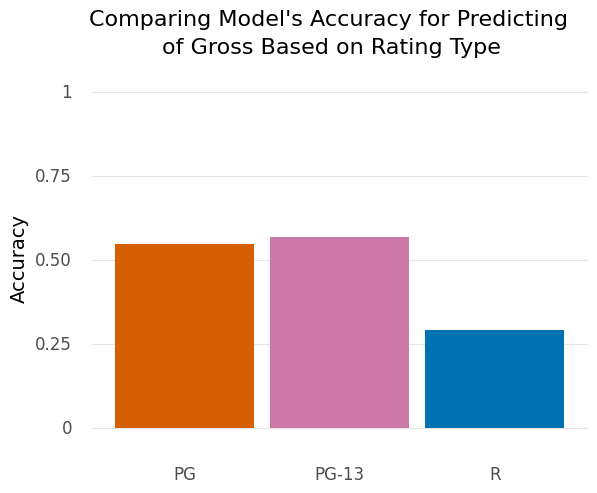

<ggplot: (8761979476914)>

In [96]:
# make a new data frame with just the income groups and their accuracy scores
rating = ["PG", "PG-13", "R"] 
acc = [acc_PG, acc_PG13, acc_R]
mylist = {"Rating": rating, "Accuracy": acc}
df_ratings = pd.DataFrame(mylist)

# used to set the x-axis in this specific order
positions = ("PG", "PG-13", "R")

(ggplot(df_ratings, aes(x = "Rating", y = "Accuracy", fill = "Rating")) + 
     geom_bar(stat="identity") + 
     theme_minimal() +
     labs(x = "", y = "Accuracy") + 
     ggtitle("Comparing Model's Accuracy for Predicting \nof Gross Based on Rating Type") +
     scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2"]) +
     scale_x_discrete(limits = positions) +
     coord_cartesian(ylim = (0, 1)) +
     theme(panel_grid_minor_x = element_blank(),
     panel_grid_minor_y = element_blank(), 
     panel_grid_major_x = element_blank(),
     axis_text_x = element_text(size = 12),
     axis_title_x = element_text(size = 14),
     axis_text_y = element_text(size = 12),
     axis_title_y = element_text(size = 14),
     plot_title = element_text(lineheight = 1.5, size = 16),
     legend_text = element_text(size = 12),
     legend_position = "none"))

*Caption: Comparing how the Logistic Regression model's accuracy at predicting whether a movie grossed over 20,000,000  dollars or under 20,000,000 dollars varies based on the rating type of the movie. An accuracy of 0 means that the model never got any of its predictions correct, while an accuracy of 1 means that a model got all of its predictions correct. As the graph shows, the model performs similarly for rated PG and PG-13 moves, but relatively worse for rated R movies.*

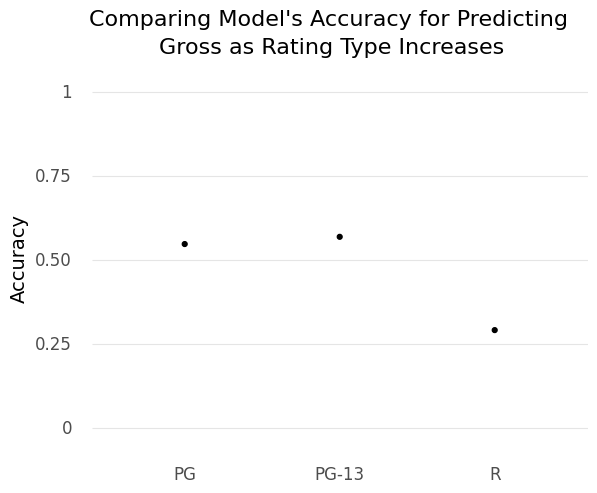

<ggplot: (8761837366908)>

In [107]:
(ggplot(df_ratings, aes(x = "Rating", y = "Accuracy")) + 
     geom_point() +
     theme_minimal() + 
     labs(x = "", y = "Accuracy") + 
     ggtitle("Comparing Model's Accuracy for Predicting \nGross as Rating Type Increases") +
     scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2"]) +
     scale_x_discrete(limits = positions) +
     coord_cartesian(ylim = (0, 1)) +
     theme(panel_grid_minor_x = element_blank(),
     panel_grid_minor_y = element_blank(), 
     panel_grid_major_x = element_blank(),
     axis_text_x = element_text(size = 12),
     axis_title_x = element_text(size = 14),
     axis_text_y = element_text(size = 12),
     axis_title_y = element_text(size = 14),
     plot_title = element_text(lineheight = 1.5, size = 16),
     legend_text = element_text(size = 12),
     legend_position = "none"))

*Caption: Comparing how the Logistic Regression model's accuracy at predicting whether a movie grossed over 20,000,000 dollars or under 20,000,000 dollars varies as the rating type of the movie increases, or the movies become more restricted. An accuracy of 0 means that the model never got any of its predictions correct, while an accuracy of 1 means that a model got all of its predictions correct. As the graph shows, the model performs similarly for rated PG and PG-13 moves, but its performance declines for rated R movies.*

Based on the analyses above, the model is most accurate at predicting whether a movie grosses over or under 20,000,000 dollars for movies with a PG-13 rating. It is similar but slightly less accurate for movies with a PG rating and least accurate for movies with an R-rating. What this suggests is that it is harder to predict whether a movie will gross at least 20,000,000 dollars if a movie is rated R. For movies rated PG and PG-13 it is easier to predict if they will gross at least 20,000,000 dollars. So, the optimal use of this model would be to predict the gross of movies that are rated PG and PG-13, not rated R. 

To perform the analyses, we first created a new column in our dataset that showed if each movie grossed over 20,000,000 dollars (1) or under 20,000,000 dollars (0). Then, after we split our data into test and training datasets, we standardized our data (i.e., put them on the same scale) by performing z-scoring. Next, we created a Logistic Regression model, which is a type of machine learning model that can predict things into two categories. In the context of this question, we used our model to predict if movies grossed above 20,000,000 dollars or below 20,000,000 dollars. After fitting our model with the training dataset, we calculated the accuracy of our model on both the training data and test data, and we found that our model achieved accuracies of about 0.82 and 0.84, respectively. Not only do these accuracies indicate that our model is relatively good at predicting whether a movie grossed above or below 20,000,000 dollars, but they also indicate that our model is not overfitted, or too specific to the data it was trained on. We can infer this because the two accuracies are similar, so there is not a big difference in performance for our model on seen and unseen data. 

We then specifically looked at how our model's performance varies based on if the movie is rated PG, PG-13, or R by filtering our dataset based on these three rating types. Then, we calculated the model's accuracy at predicting gross for each of the rating types and plotted these values on a bar and line graph in order to directly compare them. The graphs confirm that our model performs best (i.e., accurately predict if a movie grossed above or below 20,000,000 dollars) for rated PG and PG-13 movies, while its performance is noticeably worse for rated R movies.